<center>
    <img src="https://drive.google.com/uc?export=view&id=1hDKusF04c0lNZA_qOShvWQrpImayVKz8"  width="1000" />
</center>

# Hands-On
---
Hands-On ini digunakan pada kegiatan Kursus Data Science yang merupakan pembekalan bagi mahasiswa Universitas Gunadarma untuk Skema Associate Data Scientist

### Pertemuan 2 - Semester 7

### Daftar Isi :
1. Parameter Data Cleaning
2. Parameter Data Validation
3. Validasi Data

### 1. Parameter *Data Cleaning*
---

Laporan dokumentasi data cleaning, setidaknya memiliki parameter berikut:
- Data Set Description
- Data Set yang digunakan
- Jenis noise yang terjadi pada data (diantaranya: Missing data, Data errors; Coding  inconsistencies; Missing/ bad metadata
- Pendekatan yang dilakukan untuk menghilangkan noise tersebut
- Teknik mana yang digunakan sehingga berhasil untuk menghilangkan noise  tersebut
- Apakah ada kasus atau atribut yang tak dapat diselamatkan
- Pastikan data yang dikecualikan karena kondisi noisenya


### 2. Parameter *Data Validation*
---

Laporan dokumentasi data validasi, setidaknya memiliki parameter berikut:
- Validasi data
- Kebenaran, misal di Indonesia isian Gender yang diakui hanya 2 P/W; Agama hanya 6 (Islam,  Protestan, Katholik, Hindu, Budha, Konghucu)
- Kelengkapan, misal data provinsi seluruh Indonesia (34 prov), namun hanya sebagian yg ada
- Konsistensi, misal penulisan STM atau SMK;
- Kecukupan data → Perlukan diulang berikan justifikasi (Resampling)


### 3. Validasi Data
---

Verifikasi vs Validasi
- Verifikasi: Benar vs Salah (sesuai prosedur)
- Validasi: Kuat vs Lemah (sesuai kenyataan)

Teknik Validasi Data dan Model
- Akurasi  Kelengkapan  Konsistensi  Ketepatan Waktu  Kepercayaan  Nilai Tambah  Penafsiran
- Kemudahan Akses

Validasi merupakan tahapan kritikal yang sering  diabaikan DS-tist pemula, karena memeriksa,  diantaranya sbb:
- Tipe Data (mis. integer, float, string) Range Data
- Uniqueness (mis. Kode Pos)
- Consistent expression (mis. Jalan, Jl., Jln.)
- Format Data (mis. utk tgl “YYYY-MM-DD” vs “DD-MM-YYYY”) → tmt (terhitung mulai tanggal)
- Nilai Null/Missing Values
- Misspelling/Type
- Invalid Data (gender: L/P: L; Laki-laki; P:  Pria/Perempuan? )



## Contoh Kasus Data Preparation 1
---

In [1]:
# Import Library Pandas
import pandas as pd

In [2]:
# Memuat data berformat CSV
df = pd.read_csv('delay_maskapai.csv')

In [3]:
# Menampilkan 5 baris teratas dari dataset
df.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,320.0,870.0,180.0,CO,IAH,PHX,5,0
1,3045.0,365.0,66.0,OO,DSM,MKE,2,0
2,1560.0,740.0,257.0,DL,SEA,CVG,7,0
3,1156.0,595.0,235.0,WN,SNA,MDW,7,1
4,1873.0,530.0,133.0,CO,IAH,MCO,6,1


#### Data cleansing - membuang kolom
Dari dataset di atas dapat diketahui bahwa kolom Flight merupakan kolom untuk ID masing-masing penerbangan, kolom ini dapat dibuang karena tidak memiliki makna rill. Untuk membuang kolom dapat menggunakan fungsi iloc maupun drop, berikut adalah perbedaan penggunaan loc dan iloc

<center>
    <img src="https://miro.medium.com/v2/resize:fit:1400/1*dYtynwab99wnMqfgyPUd3w.png"  width="500" />
</center>

In [4]:
# Membuang kolom Flight menggunakan fungsi iloc
df_drop1 = df.iloc[:,1:8]

In [5]:
df_drop1.head()

,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,870.0,180.0,CO,IAH,PHX,5,0
1,365.0,66.0,OO,DSM,MKE,2,0
2,740.0,257.0,DL,SEA,CVG,7,0
3,595.0,235.0,WN,SNA,MDW,7,1
4,530.0,133.0,CO,IAH,MCO,6,1


In [6]:
# Membuang kolom Flight dengan fungsi drop - memuat dataset
df_drop2 = pd.read_csv('delay_maskapai.csv')

In [7]:
# Membuang kolom flight dengan fungsi drop
df_drop2.drop(['Flight'],axis=1,inplace=True)

In [8]:
df_drop2.head()

,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,870.0,180.0,CO,IAH,PHX,5,0
1,365.0,66.0,OO,DSM,MKE,2,0
2,740.0,257.0,DL,SEA,CVG,7,0
3,595.0,235.0,WN,SNA,MDW,7,1
4,530.0,133.0,CO,IAH,MCO,6,1


#### Data cleansing - Mengubah indeks di dataframe
Karena tidak ada kolom yang bernilai unik pada dataframe, maka kita perlu membuat kolom unik terlebih dahulu dan menjadikan kolom tersebut sebagai index dengan numpy

In [9]:
#Import Library
import numpy as np

In [10]:
df_index = pd.read_csv('delay_maskapai.csv')

In [11]:
unique_id = np.random.choice(len(df),size=len(df),replace=False)

In [12]:
df_index['unique_id'] = unique_id

In [13]:
df_index['unique_id'].is_unique

True

In [14]:
df_index = df_index.set_index('unique_id')

In [15]:
df_index.drop(['Flight'],axis=1,inplace=True)

In [16]:
df_index.head()

,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
unique_id,,,,,,,
7534,870.0,180.0,CO,IAH,PHX,5,0
8359,365.0,66.0,OO,DSM,MKE,2,0
3222,740.0,257.0,DL,SEA,CVG,7,0
5347,595.0,235.0,WN,SNA,MDW,7,1
930,530.0,133.0,CO,IAH,MCO,6,1


#### Data cleansing - Merapikan *Fields* dalam data

Pada dataset ini, kolom "Time" merupakan waktu keberangkatan dari sebuah maskapai. Kondisi nilai pada kolom tersebut adalah waktu yang dikonversi ke menit, untuk melihat jumlah delay terbanyak dari semua waktu keberangkatan, kita perlu mengonversi menit tersebut ke dalam jam dan menit

In [17]:
Time = pd.to_datetime(df.Time, unit='m').dt.strftime('%H.%M')

- pd.to_datetime(df.Time, unit='m'): Memanggil fungsi to_datetime dari modul pandas dan memberikan kolom 'Time' dari DataFrame df sebagai argumen pertama. Argumen unit='m' digunakan untuk mengindikasikan bahwa nilai dalam kolom 'Time' dianggap sebagai jumlah menit.
    
    Fungsi to_datetime mengonversi nilai numerik menjadi objek Pandas DateTime yang dapat diolah lebih lanjut. Dalam hal ini, setiap nilai dalam kolom 'Time' dianggap sebagai jumlah menit sejak awal waktu (misalnya, 0 menit adalah awal waktu).

- .dt.strftime('%H.%M'): Menggunakan metode .dt untuk mengakses properti datetime pada kolom yang diubah tipe datanya. Kemudian, metode strftime digunakan untuk memformat nilai datetime menjadi string dengan format yang ditentukan.
    
    Dalam hal ini, format string yang digunakan adalah '%H.%M', yang berarti mengonversi nilai datetime menjadi string dengan format "jam.menit". Misalnya, nilai datetime 390 akan diubah menjadi string "06.30".

In [18]:
df['DepartTime'] = Time

In [19]:
df.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class,DepartTime
0,320.0,870.0,180.0,CO,IAH,PHX,5,0,14.30
1,3045.0,365.0,66.0,OO,DSM,MKE,2,0,06.05
2,1560.0,740.0,257.0,DL,SEA,CVG,7,0,12.20
3,1156.0,595.0,235.0,WN,SNA,MDW,7,1,09.55
4,1873.0,530.0,133.0,CO,IAH,MCO,6,1,08.50


In [20]:
Time_Class_Sum = df.groupby('DepartTime').sum(numeric_only=True)['Class'].sort_index()
Time_Class_Sum.head()

DepartTime
00.15    1
00.30    0
00.35    1
00.40    1
00.49    0
Name: Class, dtype: int64

- df.groupby('DepartTime'): Menggunakan metode groupby pada DataFrame df untuk mengelompokkan data berdasarkan nilai unik dalam kolom 'DepartTime'. Ini menciptakan objek GroupBy yang membagi data menjadi kelompok-kelompok berdasarkan nilai 'DepartTime'.
- .sum()['Class']: Setelah data dikelompokkan, digunakan metode .sum() untuk menghitung jumlah (sum) nilai dalam setiap kelompok. Kemudian, operator ['Class'] digunakan untuk memilih kolom 'Class' dari hasil pengelompokan. Ini menghasilkan Series yang berisi nilai jumlah 'Class' untuk setiap kelompok 'DepartTime'.

- .sort_index(): Setelah menghitung jumlah 'Class' untuk setiap kelompok, metode .sort_index() digunakan untuk mengurutkan hasil berdasarkan indeksnya. Hal ini menghasilkan Series yang diurutkan berdasarkan nilai unik dalam kolom 'DepartTime'.

In [21]:
Time_Class_Sum.sort_values(ascending=False).head(20)

DepartTime
06.00    50
19.00    38
17.00    38
07.00    37
16.00    36
12.00    36
11.40    35
20.00    34
19.05    33
14.45    33
17.30    32
10.00    32
12.05    32
11.55    31
16.30    31
18.15    30
15.15    30
11.45    30
18.20    29
12.30    29
Name: Class, dtype: int64

Dari kode di atas dapat diketahui bahwa waktu 06.00 merupakan waktu dengan jumlah terbanyak. Berikut kita akan lakukan visualisasi dengan line chart

In [22]:
import matplotlib.pyplot as plt

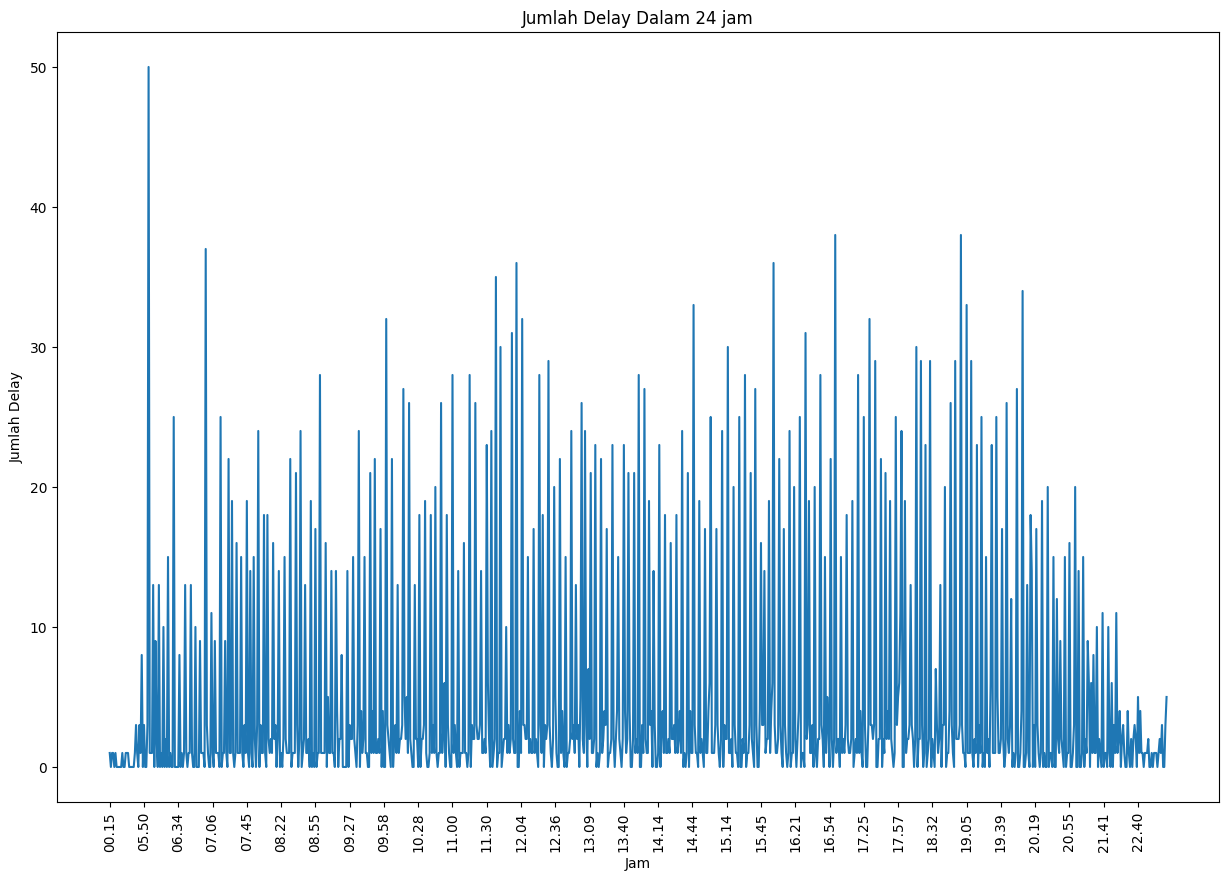

In [23]:
# Mengatur ukuran gambar
plt.figure(figsize=(15, 10))

# Melakukan plot data
Time_Class_Sum.plot()

# Mengatur label sumbu x
ticks = range(0, len(Time_Class_Sum.index), 30)  # Menentukan posisi label setiap setengah jam
labels = Time_Class_Sum.index[ticks]  # Mengambil label berdasarkan posisi
plt.xticks(rotation=90) # Mengatur posisi rotasi label pada sumbu x
plt.xticks(ticks, labels)  # Mengatur posisi dan label pada sumbu x

# Mengatur label sumbu y dan judul grafik
plt.xlabel('Jam')
plt.ylabel('Jumlah Delay')
plt.title('Jumlah Delay Dalam 24 jam')

# Menampilkan grafik
plt.show()


#### Data cleansing - Mengganti Nama Kolom

Kita dapat mengganti nama kolom "Time" menjadi "DepartTime"

In [24]:
df_rename_col = pd.read_csv('delay_maskapai.csv')

In [25]:
df_rename_col.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,320.0,870.0,180.0,CO,IAH,PHX,5,0
1,3045.0,365.0,66.0,OO,DSM,MKE,2,0
2,1560.0,740.0,257.0,DL,SEA,CVG,7,0
3,1156.0,595.0,235.0,WN,SNA,MDW,7,1
4,1873.0,530.0,133.0,CO,IAH,MCO,6,1


In [26]:
df_rename_col = df_rename_col.rename(columns={"Time":"DepartTime"})

In [27]:
df_rename_col.head()

,Flight,DepartTime,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,320.0,870.0,180.0,CO,IAH,PHX,5,0
1,3045.0,365.0,66.0,OO,DSM,MKE,2,0
2,1560.0,740.0,257.0,DL,SEA,CVG,7,0
3,1156.0,595.0,235.0,WN,SNA,MDW,7,1
4,1873.0,530.0,133.0,CO,IAH,MCO,6,1
